In [1]:
import math
import random
import numpy as np
import squigglepy as sq
from squigglepy.numbers import K, M, B, T
import matplotlib.pyplot as plt

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
from datetime import datetime as dt

exec(open('utils.py').read())
print('Loaded')

Loaded


"Frontier lab" is defined as an AI company that has trained a model with an amount of compute that's within one order of magnitude of the world leading model (world leading in terms of most training compute).

## How many frontier labs by EOY 2030? ##


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2721.27it/s]


Writing cache to file `caches/n_labs.sqcache.npy`...
...Cached
{1: 0,
 5: 2,
 10: 4,
 20: 6,
 30: 7,
 40: 9,
 50: 10,
 60: 11,
 70: 13,
 80: 15,
 90: 19,
 95: 22,
 99: 28}


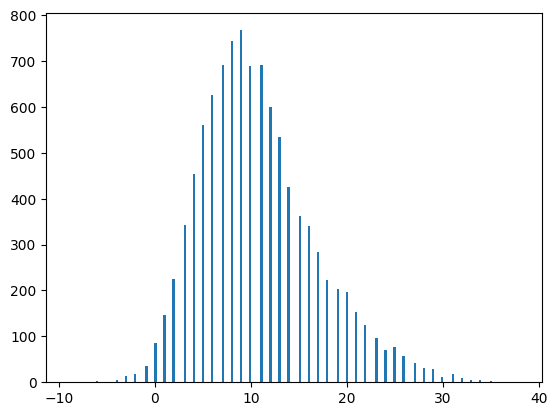

In [2]:
RUNS = 10*K

p_merger = 0.05
p_weak_catchup = 0.6 # Enough of a catchup for some of Meta, Mistral, xAI, Yandex, Hugging Face, etc., to become frontier
p_strong_catchup = 0.3 # Enough of a catchup for open source to become frontier


def model_n_labs(end_year):
    n_labs = 3 # Currently OpenAI, and Anthropic
    annual_lab_creation_rate = 5 / 4 # OpenAI, Anthropic, Google, Deepmind, and Inflection have been various frontier labs over 2020-2024
    annual_lab_leave_rate = 3 / 4 # Google-Deepmind merge, Microsoft-Inflection acquisition, Anthropic dropped from frontier but then came back
    
    china_back_date = int(np.round(~sq.lognorm(1, 15))) + CURRENT_YEAR
    
    if end_year > 2026 and sq.event(p_weak_catchup):
        n_labs += sq.norm(1, 4)
        
    if end_year > 2028 and sq.event(p_strong_catchup):
        n_labs += sq.norm(3, 10)
    
    for y in range(CURRENT_YEAR, end_year):
        if y == china_back_date:
            n_labs *= 1.5

        n_labs += sq.poisson(annual_lab_creation_rate)
        n_labs -= sq.poisson(annual_lab_leave_rate)
        
    return sq.dist_floor(n_labs)
    
    
print('## How many frontier labs by EOY 2030? ##')
n_lab_samples = sq.sample(lambda: model_n_labs(2030), n=RUNS, verbose=True, dump_cache_file='caches/n_labs')
pprint(sq.get_percentiles(n_lab_samples, digits=0))
plt.hist(n_lab_samples, bins=200)
plt.show()

In [3]:
np.mean([n > 10 for n in n_lab_samples])

0.4598

## How many frontier labs by EOY 2026? ##


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 16793.77it/s]


{1: 0,
 5: 1,
 10: 2,
 20: 2,
 30: 3,
 40: 3,
 50: 3,
 60: 4,
 70: 4,
 80: 5,
 90: 5,
 95: 6,
 99: 7}


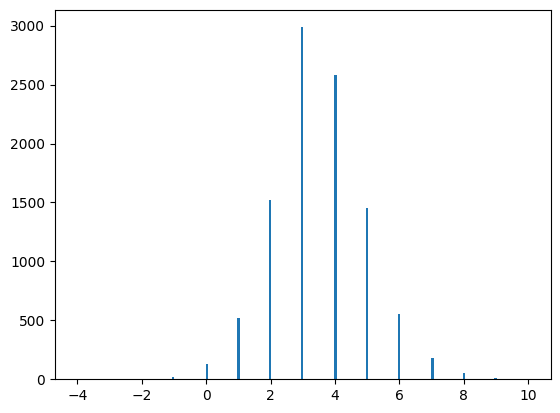

In [4]:
# https://www.metaculus.com/questions/17101/number-of-frontier-ai-labs-on-dec-31-2025/
print('## How many frontier labs by EOY 2026? ##')
n_lab_samples_2026 = sq.sample(lambda: model_n_labs(2026), n=RUNS, verbose=True)
pprint(sq.get_percentiles(n_lab_samples_2026, digits=0))
plt.hist(n_lab_samples_2026, bins=200)
plt.show()

In [5]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2024-03-30 10:16:01.099103
